<div dir=ltr align=center>In the name of God</div>
<br>
<font size=6><div dir=ltr align=center>
<font size=5>
Intelligent Analysis of
Biomedical Images
<br>
<font size=4>
sharif university of technology, CE department
</font>
<br>
<font size=3>
Dr. Rohban
</font>
<br>
<br>
<font size=6>
Homework 2
</font><br>
<font size=4>


In the following notebook, we use a ct-scan image to create its sinogram, then try to reconstruct the image by applying back projection on the obtained sinogram.

In [1]:
import numpy as np
import imutils
from skimage.transform import rotate ## Image rotation routine
import scipy.fftpack as fft          ## Fast Fourier Transform
import scipy.misc
from PIL import Image
import matplotlib.pyplot as pyp

In [2]:
def inverse_fft_translate(operator):
    return fft.irfft(operator, axis=1)

In [4]:
ref_image=Image.open('/content/CT-abdomen-400x267.jpg').convert('L')

In [5]:
def radon(image, steps):
    """
    Computes the Radon Transform of an image.

    Parameters:
    -----------
    image : ndarray
        Input 2D array representing the grayscale image to be transformed.

    steps : int
        Number of projections (angles) used to compute the transform.

    Returns:
    --------
    ndarray
        A sinogram representing the accumulated projections of the input image.
    """


In [6]:
sinogram=radon(np.array(ref_image),600)

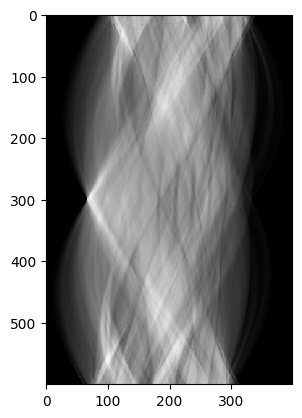

In [7]:
pyp.imshow(sinogram,interpolation='nearest',cmap='gray')

In [8]:
def back_project(operator):
    """
    Performs the back-projection operation to reconstruct an image
    from its projections (sinogram).

    This function takes a sinogram as input, where each row corresponds to a
    projection of the original image at a specific angle. It applies the inverse
    Radon Transform through back-projection by rotating each projection back to
    its original angle and accumulating them to form the final reconstructed image.

    Parameters:
    -----------
    operator : ndarray
        A 2D array representing the sinogram, where each row is a projection
        at a specific angle.

    Returns:
    --------
    ndarray
        The reconstructed image (laminogram) obtained through back-projection.
    """
    pass  # Placeholder for future implementation


In [9]:
unfiltered_reconstruction = back_project(sinogram)

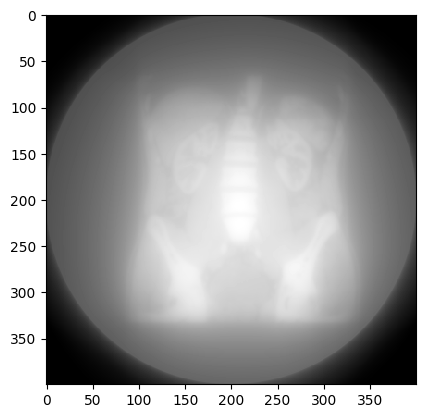

In [10]:
pyp.imshow(unfiltered_reconstruction,interpolation='nearest',cmap='gray')

In [11]:
def fft_translate(projs):
    #Build 1-d FFTs of an array of projections, each projection 1 row of the array.
    return fft.rfft(projs, axis=1)

In [13]:
frequency_domain_sinogram = fft_translate(sinogram)

In [14]:
def ramp_filter(ffts):
    """
    Applies a ramp filter to a 2D array of 1D FFTs along its rows.

    The ramp filter enhances the high-frequency components, which helps
    in the reconstruction of sharp edges in an image. This technique is
    often used in filtered back-projection algorithms to improve the
    quality of the reconstructed image.

    Parameters:
    -----------
    ffts : ndarray
        A 2D array where each row represents the 1D Fourier Transform (FFT)
        of a projection. Shape is (N, M)

    Returns:
    --------
    ndarray
        A 2D array of the same shape as the input, where each row has been
        multiplied by the corresponding ramp filter values.
    """



In [15]:
filtered_frequency_domain_sinogram = ramp_filter(frequency_domain_sinogram)

In [16]:
filtered_spatial_domain_sinogram = inverse_fft_translate(filtered_frequency_domain_sinogram)

In [17]:
reconstructed_image = back_project(filtered_spatial_domain_sinogram)

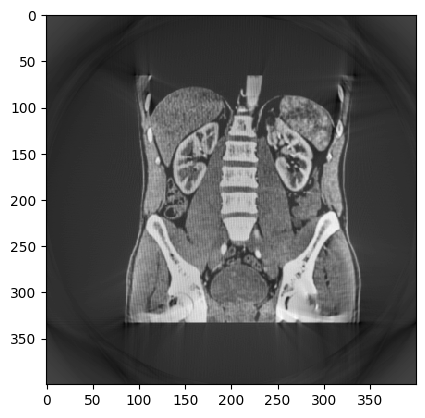

In [18]:
pyp.imshow(reconstructed_image,interpolation='nearest',cmap='gray')